# Linear Regression Project

The project is basically for an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website and we'll try to find a solutions for them.

__*Important: I did this project when I was taking a course on Udemy (Ref: Portilla, J. (n.d.). Learn python for data science, structures, algorithms, interviews. Retrieved March 02, 2021, from https://www.udemy.com/course/python-for-data-science-and-machine-learning-bootcamp/) so the data was provided in the course and hence all the information like credit card numbers or emails are not real.__

## Imports
**Import pandas, numpy, matplotlib,and seaborn and then set %matplotlib inline**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, such as Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

**Let's read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [2]:
customers= pd.read_csv('Ecommerce Customers')

In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


**Let's Check the head of customers, and check out its info() and describe() methods.**

In [7]:
customers.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [11]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [12]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

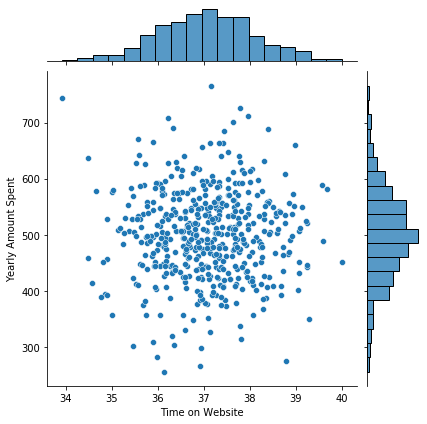

In [7]:
sns.jointplot(x='Time on Website', y='Yearly Amount Spent', data=customers)

**Let's Do the same but with the Time on App column instead.**

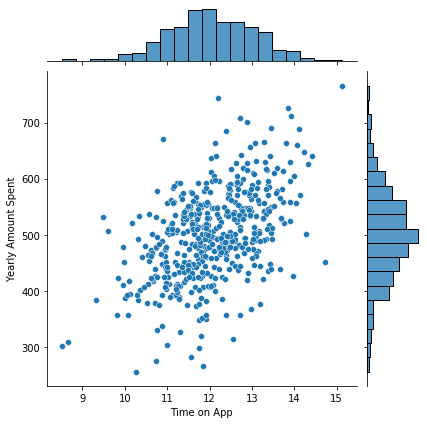

In [8]:
sns.jointplot(x='Time on App', y='Yearly Amount Spent', data=customers)

**Let's use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

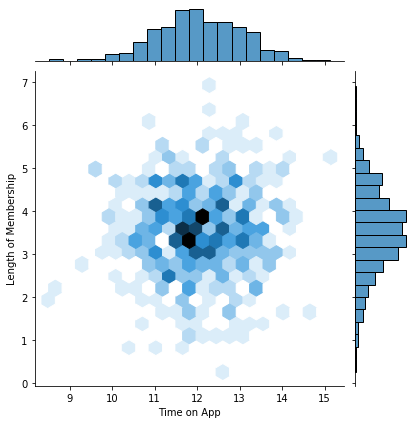

In [9]:
sns.jointplot(x='Time on App', y='Length of Membership', data=customers, kind="hex")

**Let's explore these types of relationships across the entire data set. We can use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to do so.**

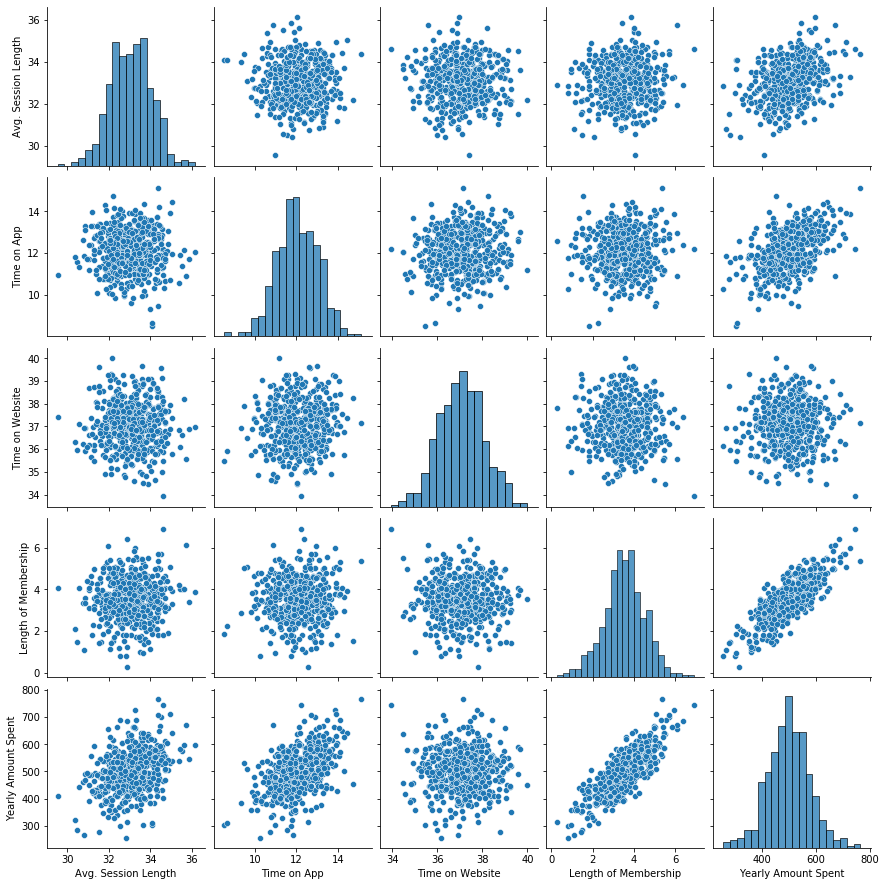

In [10]:
sns.pairplot(data=customers)

_**It is visible from the plots that the Yearly Amount Spend looks to be most correlated with Length of Membership**_

**Let's create a linear model plot of  Yearly Amount Spent vs. Length of Membership.**

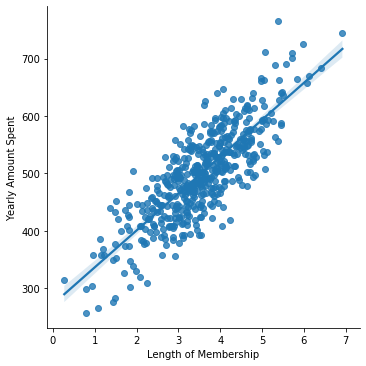

In [48]:
sns.lmplot(x='Length of Membership',y='Yearly Amount Spent',data=customers)

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
We are going to set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column.

In [13]:
customers.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [3]:
X=customers[['Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership']]

In [4]:
y=customers['Yearly Amount Spent']

**We can use model_selection.train_test_split from sklearn to split the data into training and testing sets and we can set test_size=0.3 and random_state=101, random_state can also be left blank but just so that I can refer back to these results in the future, I am setting it to 101**

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
y_train

202    443.965627
428    556.298141
392    549.131573
86     487.379306
443    561.516532
          ...    
63     483.159721
326    505.230068
337    440.002748
11     522.337405
351    533.396554
Name: Yearly Amount Spent, Length: 350, dtype: float64

## Training the Model

Now its time to train our model on our training data!

**Import LinearRegression from sklearn.linear_model**

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
lm = LinearRegression()

In [9]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Let's create an instance of a LinearRegression() model named lm.**

In [10]:
lm = LinearRegression()

**Train/fit lm on the training data.**

In [11]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Let's check out the coefficients of the model**

In [12]:
print(lm.coef_)

[25.98154972 38.59015875  0.19040528 61.27909654]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

**Use lm.predict() to predict off the X_test set of the data.**

In [13]:
lm.predict(X_test)

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

**Let's create a scatterplot of the real test values versus the predicted values.**

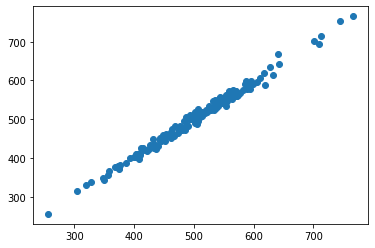

In [50]:
plt.scatter(y_test, lm.predict(X_test))

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

**We can calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error**

In [51]:
from sklearn import metrics

In [55]:
metrics.mean_absolute_error(lm.predict(X_test),y_test)

7.228148653430838

In [ ]:
metrics.mean_squared_error(lm.predict(X_test), y_test)

In [59]:
np.sqrt(metrics.mean_squared_error(lm.predict(X_test), y_test))

8.933815066978642

In [63]:
print("MAE:",metrics.mean_absolute_error(lm.predict(X_test),y_test))
print("MSE:",metrics.mean_squared_error(lm.predict(X_test), y_test))
print("RMSE:",np.sqrt(metrics.mean_squared_error(lm.predict(X_test), y_test)))

MAE: 7.228148653430838
MSE: 79.81305165097461
RMSE: 8.933815066978642


In [80]:
metrics.explained_variance_score(lm.predict(X_test),y_test)

0.9887793678920463

## Residuals

It looks like we got a good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**We can plot a histogram of the residuals and make sure it looks normally distributed**

C:\Users\Rishi\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


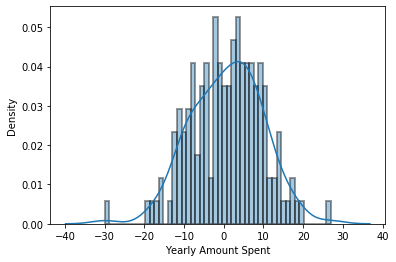

In [19]:
pred=lm.predict(X_test)
sns.distplot(pred-y_test, kde=True, bins=50,hist_kws=dict(edgecolor="k", linewidth=2))

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforts on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

In [79]:
pd.DataFrame(lm.coef_, X.columns, columns=['Coeffecient'])

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


**How can we interpret these coefficients? Should the company focus more on their mobile app or on their website?**

From the coefficients, we can see that the customers spend more when they spend time on app vs the website. It also indicates that the website is not working as well as the app and company can focus the efforts to revamp the website so that it can catch up to the app. Regardless, length of the membership should be the priority as that is main factor that increases the amount a customer is spending.